In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
data = pd.read_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Capstone project  Mahindra Group\Clean Data\Clean Data set\clean.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Clean_CITY,Clean_District,Unnamed: 0_y,Business Partner,Partner Type,Data Origin,Unnamed: 0.1.1,DBM Order,Item Category,Net value,Order Quantity
0,0,0,0,Retail,67849,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,Thane,Maharashtra,nan,NaN,nan,NaN,339512.000000,168303.000000,P001,1203.140000,73.000000
1,1,0,0,Retail,67849,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,Thane,Maharashtra,nan,NaN,nan,NaN,339513.000000,168303.000000,P002,2348.750000,6.500000
2,2,0,0,Retail,67849,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,Thane,Maharashtra,nan,NaN,nan,NaN,339514.000000,168303.000000,P010,500.060000,1.000000
3,3,1,1,Retail,84419,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,Thane,Maharashtra,nan,NaN,nan,NaN,351037.000000,173997.000000,P001,804.260000,170.000000
4,4,1,1,Retail,84419,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,Thane,Maharashtra,nan,NaN,nan,NaN,351038.000000,173997.000000,P011,197.030000,1.000000


In [4]:
data =  data.drop(columns=['Unnamed: 0','Unnamed: 0_x','Unnamed: 0.1'],axis = 1)

In [5]:
data["Invoice_DateTime"]=data["Invoice Date"]+' '+data["Invoice Time"]
data["JobCard_DateTime"]=data["JobCard Date"]+' '+data["JobCard Time"]
data['JobCard_DateTime'] = pd.to_datetime(data['JobCard_DateTime'],dayfirst=True)
data['Invoice_DateTime'] = pd.to_datetime(data['Invoice_DateTime'],dayfirst=True)
data["Service_Time"]=data["Invoice_DateTime"]-data["JobCard_DateTime"]

In [6]:
data['year'] = pd.to_datetime(data['Invoice_DateTime']).dt.year
data['months'] = pd.to_datetime(data['Invoice_DateTime']).dt.month

In [7]:
data['Service_Time'].head()

0   19 days 21:00:53
1   19 days 21:00:53
2   19 days 21:00:53
3    0 days 19:55:14
4    0 days 19:55:14
Name: Service_Time, dtype: timedelta64[ns]

In [8]:
data["Invoice_DateTime"]=pd.to_datetime(data["Invoice_DateTime"],dayfirst=True)
data["JobCard_DateTime"]=pd.to_datetime(data["JobCard_DateTime"],dayfirst=True)
data['Service_Time'] = data['Invoice_DateTime'] - data['JobCard_DateTime']

In [9]:
data['Service_Time'].head()

0   19 days 21:00:53
1   19 days 21:00:53
2   19 days 21:00:53
3    0 days 19:55:14
4    0 days 19:55:14
Name: Service_Time, dtype: timedelta64[ns]

In [10]:
#data['Service_Time_Hrs'] = data['Service_Time']
data['Service_Time_Hrs'] = data['Service_Time']/np.timedelta64(1,'h')

In [11]:
data['Service_Time_Hrs'].head()

0   477.014722
1   477.014722
2   477.014722
3    19.920556
4    19.920556
Name: Service_Time_Hrs, dtype: float64

In [12]:
data[data['Service_Time_Hrs']<0]

,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Clean_CITY,Clean_District,Unnamed: 0_y,Business Partner,Partner Type,Data Origin,Unnamed: 0.1.1,DBM Order,Item Category,Net value,Order Quantity,Invoice_DateTime,JobCard_DateTime,Service_Time,year,months,Service_Time_Hrs
714423,Retail,182085,00:00:00,2016-05-02,7167000988,15:12:11,363294,2016-05-02,15:12:44,62001,0.000000,MARUTI SUZUKI,0.000000,SWIFT DZIRE,0.000000,Running Repairs,0.000000,603103,X085,X085 - SRI MOTORS,NO,0.000000,0.000000,X085SA1,Kanchipuram,Tamil Nadu,nan,NaN,nan,NaN,711636.000000,363294.000000,G2TX,0.000000,0.000000,2016-05-02 15:12:11,2016-05-02 15:12:44,-1 days +23:59:27,2016,5,-0.009167


In [13]:
data.drop(index=714423,axis=0,inplace=True)

In [14]:
data['Service_Time_Hrs'].describe()

count   936274.000000
mean        89.878878
std        275.096046
min          0.010000
25%          4.048611
50%         23.259028
75%         73.230278
max      17769.261389
Name: Service_Time_Hrs, dtype: float64

# Clustering

In [15]:
data.head()

,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Clean_CITY,Clean_District,Unnamed: 0_y,Business Partner,Partner Type,Data Origin,Unnamed: 0.1.1,DBM Order,Item Category,Net value,Order Quantity,Invoice_DateTime,JobCard_DateTime,Service_Time,year,months,Service_Time_Hrs
0,Retail,67849,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,Thane,Maharashtra,nan,NaN,nan,NaN,339512.000000,168303.000000,P001,1203.140000,73.000000,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,1,477.014722
1,Retail,67849,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,Thane,Maharashtra,nan,NaN,nan,NaN,339513.000000,168303.000000,P002,2348.750000,6.500000,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,1,477.014722
2,Retail,67849,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,Thane,Maharashtra,nan,NaN,nan,NaN,339514.000000,168303.000000,P010,500.060000,1.000000,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,1,477.014722
3,Retail,84419,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,Thane,Maharashtra,nan,NaN,nan,NaN,351037.000000,173997.000000,P001,804.260000,170.000000,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,2015,1,19.920556
4,Retail,84419,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,Thane,Maharashtra,nan,NaN,nan,NaN,351038.000000,173997.000000,P011,197.030000,1.000000,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,2015,1,19.920556


In [16]:
#### Selecting columns required for clustering
cluster_df = data[['Cust Type','Customer No.','Make','Model','Order Type','Clean_CITY','Invoice No','Service_Time_Hrs','Total Amt Wtd Tax.','Net value']]

In [17]:
cluster_df.shape

(936274, 10)

In [18]:
cluster_df.isnull().sum()

Cust Type              0
Customer No.           0
Make                   0
Model                  0
Order Type             0
Clean_CITY             0
Invoice No             0
Service_Time_Hrs       0
Total Amt Wtd Tax.     0
Net value             39
dtype: int64

In [19]:
cluster_df = cluster_df[cluster_df['Net value'].notnull()]

In [20]:
cluster_df.shape

(936235, 10)

Selecting columns required for clustering

In [21]:
clusters = cluster_df.groupby(['Customer No.','Cust Type','Make','Model','Clean_CITY','Order Type']).agg(
                                {
                                 'Invoice No':'nunique',
                                 'Net value':'sum',
                                 'Total Amt Wtd Tax.':'sum',
                                 'Service_Time_Hrs':'mean'
                                }
                            )

In [22]:
clusters.columns =['Total Invoices','Toal Net Vaue ','Total Revenue','Total Servicing Hrs']

In [23]:
clusters = clusters.reset_index()

In [24]:
clusters.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs
0,1,Retail,MARUTI SUZUKI,KIZASHI,Pune,Paid Service,1,0.000000,0.000000,901.082222
1,1,Retail,MARUTI SUZUKI,OMNI,Pune,Paid Service,2,0.000000,0.000000,2674.040000
2,1,Retail,MARUTI SUZUKI,OMNI,Pune,Running Repairs,1,0.000000,0.000000,321.365833
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,25695.460000,20.744222
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,599.840000,3.071389


In [25]:
clusters.shape

(345232, 10)

# Customer segmentation Analysis on Cluster Data set

Separating customers with zero revenue

In [26]:
zero_spenders = clusters[clusters['Total Revenue']<=0]

In [27]:
zero_spenders['Clusters'] = 'zero_spenders'

In [28]:
zero_spenders.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs,Clusters
0,1,Retail,MARUTI SUZUKI,KIZASHI,Pune,Paid Service,1,0.000000,0.000000,901.082222,zero_spenders
1,1,Retail,MARUTI SUZUKI,OMNI,Pune,Paid Service,2,0.000000,0.000000,2674.040000,zero_spenders
2,1,Retail,MARUTI SUZUKI,OMNI,Pune,Running Repairs,1,0.000000,0.000000,321.365833,zero_spenders
10,10000,Retail,MARUTI SUZUKI,WAGONR,Hyderabad,SMC Redemption,2,0.000000,0.000000,1.629167,zero_spenders
16,100002,Retail,FORD,FIGO,Panchkula,Running Repairs,1,0.000000,0.000000,0.113333,zero_spenders


In [29]:
count = zero_spenders['Clusters'].count()
print('Count of Zero spenders : ', count)

Count of Zero spenders :  29222


Separating customers with more than zero spends

In [30]:
non_zero_spenders = clusters[clusters['Total Revenue']>0]

In [31]:
print("0.05 quantile :-",non_zero_spenders ['Total Revenue'].quantile(0.05))
print("0.25 quantile :-",non_zero_spenders ['Total Revenue'].quantile(0.25))
print("0.50 quantile :-",non_zero_spenders ['Total Revenue'].quantile(0.50))
print("0.75 quantile :-",non_zero_spenders ['Total Revenue'].quantile(0.75))
print("0.95 quantile :-",non_zero_spenders ['Total Revenue'].quantile(0.95))
print("minimum total revenue :-",non_zero_spenders ['Total Revenue'].min())
print("maximum total revenue :-",non_zero_spenders ['Total Revenue'].max())
print("mean total revenue :-",non_zero_spenders ['Total Revenue'].mean())

0.05 quantile :- 149.48449999999997
0.25 quantile :- 928.77
0.50 quantile :- 5337.639999999999
0.75 quantile :- 16213.015
0.95 quantile :- 66928.42599999995
minimum total revenue :- 0.01
maximum total revenue :- 8893161.590000011
mean total revenue :- 17119.480378088258


In [32]:
print("0.05 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.05))
print("0.25 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.25))
print("0.50 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.50))
print("0.75 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.75))
print("0.95 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.95))
print("mimimum servicing time in hrs :-",non_zero_spenders['Total Servicing Hrs'].min())
print("maximum servicing time in hrs :-",non_zero_spenders['Total Servicing Hrs'].max())
print("mean servicing time in hrs :-",non_zero_spenders['Total Servicing Hrs'].mean())

0.05 quantile :- 0.23290277777777796
0.25 quantile :- 3.4069444444444446
0.50 quantile :- 21.056736111111114
0.75 quantile :- 72.6561111111111
0.95 quantile :- 385.7568472222222
mimimum servicing time in hrs :- 0.010277777777777778
maximum servicing time in hrs :- 17453.070833333335
mean servicing time in hrs :- 90.58034489340541


clustering is performed based on quantile analysis of total revenue column

In [33]:
# Low revenue customers (less than 0.50 quantile)
low_revenue = non_zero_spenders[(non_zero_spenders['Total Revenue']< non_zero_spenders['Total Revenue'].quantile(0.50))]

# Medium revenue customers (between 0.50 to 0.75 quantile)
lower_middle_revenue = non_zero_spenders[
                            (non_zero_spenders['Total Revenue'] > non_zero_spenders['Total Revenue'].quantile(0.50)) & 
                            (non_zero_spenders['Total Revenue']< non_zero_spenders['Total Revenue'].quantile(0.75))
                         ]

# Average revenue customers (between 0.75 to 0.95 quantile)
upper_middle_revenue = non_zero_spenders[
                        (non_zero_spenders['Total Revenue'] > non_zero_spenders['Total Revenue'].quantile(0.75)) & 
                        (non_zero_spenders['Total Revenue'] < non_zero_spenders['Total Revenue'].quantile(0.95))
                      ]

# High revenue customers (moe than 0.95 quantile)
high_revenue = non_zero_spenders[
                        (non_zero_spenders['Total Revenue'] > non_zero_spenders['Total Revenue'].quantile(0.95))
                       ]

In [34]:
print(low_revenue.shape)
print(lower_middle_revenue.shape)
print(upper_middle_revenue.shape)
print(high_revenue.shape)

(158005, 10)
(79002, 10)
(63202, 10)
(15801, 10)


In [35]:
# Naming the clusters
low_revenue['Clusters'] = 'low_revenue'
lower_middle_revenue['Clusters'] = 'lower_middle_revenue'
upper_middle_revenue['Clusters'] = 'upper_middle_revenue'
high_revenue['Clusters'] = 'high_revenue'

In [36]:
revenue_clust = pd.concat([low_revenue,lower_middle_revenue,upper_middle_revenue,high_revenue],axis=0)

In [37]:
revenue_clust.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Revenue',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
high_revenue,150899.344504,330.495413,15801
upper_middle_revenue,31703.026666,126.418889,63202
lower_middle_revenue,9793.098233,78.784034,79002
low_revenue,1570.819998,58.150779,158005


In [38]:
import seaborn as sns
sns.lmplot(data=revenue_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

Clustering based on avg servicing time

In [39]:
# super fast service (less than 0.50 quantile)
super_fast_service = non_zero_spenders[non_zero_spenders['Total Servicing Hrs']< non_zero_spenders['Total Servicing Hrs'].quantile(0.50)]

# fast service (between 0.50 to 0.75 quantile)
fast_service = non_zero_spenders[
                (non_zero_spenders['Total Servicing Hrs']> non_zero_spenders['Total Servicing Hrs'].quantile(0.50)) & 
                (non_zero_spenders['Total Servicing Hrs']< non_zero_spenders['Total Servicing Hrs'].quantile(0.75))
                ]

# slow service (between 0.75 to 0.95 quantile)
slow_service = non_zero_spenders[
                (non_zero_spenders['Total Servicing Hrs'] > non_zero_spenders['Total Servicing Hrs'].quantile(0.75)) & 
                (non_zero_spenders['Total Servicing Hrs'] < non_zero_spenders['Total Servicing Hrs'].quantile(0.95))
                ]

# super fast service (more than 0.95 quantile)
super_slow_service = non_zero_spenders[
                        non_zero_spenders['Total Servicing Hrs'] > non_zero_spenders['Total Servicing Hrs'].quantile(0.95)
                     ]

In [40]:
super_fast_service['Clusters'] = 'super_fast_service'
fast_service['Clusters'] = 'fast_service'
slow_service['Clusters'] = 'slow_service'
super_slow_service['Clusters'] = 'super_slow_service'

In [41]:
service_clust = pd.concat([super_fast_service,fast_service,slow_service,super_slow_service],axis=0)

In [42]:
service_clust.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Servicing Hrs',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
super_slow_service,67219.448355,915.072095,15801
slow_service,32401.001222,163.171307,63202
fast_service,17058.668036,39.332345,79002
super_fast_service,6027.122682,4.716014,158005


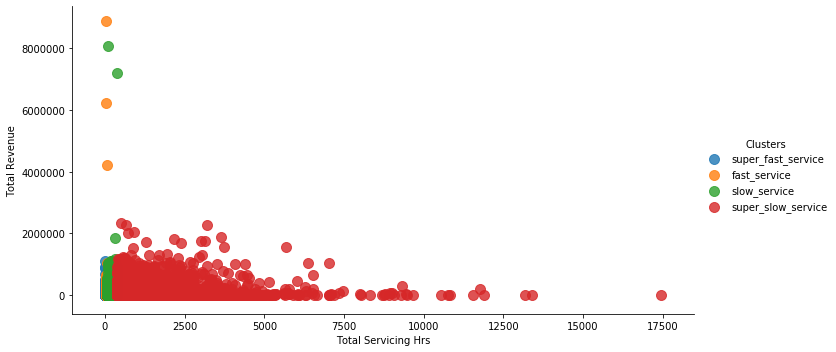

In [43]:
import seaborn as sns
sns.lmplot(data=service_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

# K-Means Clustering

In [44]:
final_cluster = non_zero_spenders

In [45]:
final_cluster.shape

(316010, 10)

In [46]:
final_cluster.describe()

,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs
count,316010.000000,316010.000000,316010.000000,316010.000000
mean,1.439182,6921.502540,17119.480378,90.580345
std,2.567137,21294.259517,52671.152773,276.974892
min,1.000000,0.000000,0.010000,0.010278
25%,1.000000,698.640000,928.770000,3.406944
50%,1.000000,2625.980000,5337.640000,21.056736
75%,1.000000,6911.607500,16213.015000,72.656111
max,925.000000,3852506.810000,8893161.590000,17453.070833


In [47]:
final_cluster.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,25695.460000,20.744222
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,599.840000,3.071389
5,100,Retail,HONDA,CITY,Mumbai,Accidental,1,14167.070000,28334.140000,98.988333
6,100,Retail,HONDA,CITY,Mumbai,Paid Service,1,6632.670000,19898.010000,49.808333
7,1000,Retail,MARUTI SUZUKI,ALTO,Pune,Paid Service,4,7617.270000,20147.490000,5.224389


In [48]:
# converting the cat data into num
X = final_cluster.drop(['Customer No.'],axis=1)
le=LabelEncoder()
X["Make"]=le.fit_transform(X["Make"])
X["Model"]=le.fit_transform(X["Model"])
X["Clean_CITY"]=le.fit_transform(X["Clean_CITY"])
# final_cluster["Clean_Location_Area"]=le.fit_transform(final_cluster["Clean_Location_Area"])
X["Cust Type"]=le.fit_transform(X["Cust Type"])
X["Order Type"]=le.fit_transform(X["Order Type"])

In [49]:
X.head()

,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs
3,6,6,146,983,2,4,10505.720000,25695.460000,20.744222
4,6,6,146,983,4,1,599.840000,599.840000,3.071389
5,6,8,50,983,0,1,14167.070000,28334.140000,98.988333
6,6,8,50,983,2,1,6632.670000,19898.010000,49.808333
7,6,13,16,1238,2,4,7617.270000,20147.490000,5.224389


Scaling the features

In [50]:
std = StandardScaler()
X=std.fit_transform(X)

In [51]:
scaled_data = pd.DataFrame(X)
scaled_data.columns = ['Cust Type','Make','Model','Clean_CITY','Order Type','Total Invoices','Toal Net Vaue','Total Revenue','Total Servicing Hrs']
scaled_data.head()

,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs
0,0.039050,-1.219341,0.203157,0.196866,-0.566043,0.997540,0.168319,0.162821,-0.252139
1,0.039050,-1.219341,0.203157,0.196866,0.763919,-0.171079,-0.296872,-0.313638,-0.315946
2,0.039050,-0.881459,-1.113928,0.196866,-1.896005,-0.171079,0.340260,0.212919,0.030357
3,0.039050,-0.881459,-1.113928,0.196866,-0.566043,-0.171079,-0.013564,0.052752,-0.147205
4,0.039050,-0.036754,-1.580396,0.742746,-0.566043,0.997540,0.032674,0.057489,-0.308173


Selecting the number of clusters

In [52]:
wcss=[]
for i in range(2,12):
    clf=KMeans(n_clusters=i,random_state=42,init='k-means++')
    clf.fit(X)
    wcss.append(clf.inertia_)

In [53]:
wcss

[2533285.3805364966,
 2204904.2739514047,
 1902792.714829576,
 1653580.956644146,
 1436084.736153005,
 1315768.1400432263,
 1191273.9246159503,
 1104608.1668798416,
 1032201.8702459759,
 972320.6530653776]

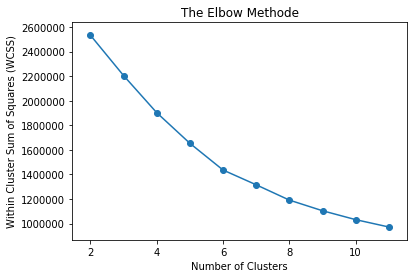

In [54]:
import matplotlib.pyplot as plt
x=np.arange(2,12)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.title('The Elbow Methode')
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters");

Calculating silhoutte score

In [55]:
clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [56]:
clf_final.fit(X)

KMeans(n_clusters=6, random_state=42)

In [57]:
final_cluster["Clusters"]=clf_final.predict(X)

In [58]:
final_cluster.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Toal Net Vaue,Total Revenue,Total Servicing Hrs,Clusters
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,25695.460000,20.744222,1
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,599.840000,3.071389,1
5,100,Retail,HONDA,CITY,Mumbai,Accidental,1,14167.070000,28334.140000,98.988333,0
6,100,Retail,HONDA,CITY,Mumbai,Paid Service,1,6632.670000,19898.010000,49.808333,0
7,1000,Retail,MARUTI SUZUKI,ALTO,Pune,Paid Service,4,7617.270000,20147.490000,5.224389,0


In [59]:
final_cluster.to_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Capstone project  Mahindra Group\Clean Data\Clean Data set\Final_Clusters.csv')

In [60]:
cluster_excel = final_cluster.groupby(["Clusters","Cust Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"}).sort_values('Total Revenue')

In [61]:
final_cluster.groupby(["Clusters","Order Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"})

Total Revenue  Total Servicing Hrs  Customer No.
Clusters Order Type                                                         
0        Accidental          25612.245128           143.557263         12476
         Mechanical           7460.605110            77.984917          4534
         Paid Service        13740.340771            67.650628         36773
         Repeat Order           40.000000             4.398889             1
         Running Repairs      8354.987211            52.280064         56317
         SMC Redemption       4728.617415            46.063946           325
         SMC Value Package   10472.408446             9.686366          3405
         WBW Order           24236.061429           210.015238             7
1        Accidental          28488.789985           143.871741         13337
         Mechanical           8386.294212            72.787301          5325
         Paid Service        16763.526951            66.216377         43822
         Repeat Order         7933.480000            22.913333             1
         Running Repairs     10314.299892            51.866658         67378
         SMC Redemption       5057.385882            58.494608           425
         SMC Value Package   11765.337626             8.996212          4540
         WBW Order           23859.560000            24.984792             4
2        Accidental         236716.557544           916.523105          3766
         Mechanical          88307.215664          1452.019850           113
         Paid Service       130677.968698          1503.788524          1329
         Running Repairs    157062.109231          1437.437210          1443
         SMC Redemption       2917.000000          2328.595764             1
         SMC Value Package  131969.857500          2160.853034             4
3        Accidental        7213250.460000           369.677205             1
         Paid Service      7165216.390000            68.096548             2
         Running Repairs   6556657.510000            48.493794             2
4        Accidental          70546.845098           271.498143           102
         Mechanical          34445.134444           479.788662             9
         Paid Service        96194.513333           115.382404           147
         Running Repairs     86367.084074           193.323197           189
         SMC Value Package   27344.545000            20.799931             6
5        Accidental          29579.190935           148.001847          6784
         Mechanical           7663.101150            72.996323          2634
         Paid Service        14985.000565            82.472901         17196
         Running Repairs      8287.579022            56.012496         32283
         SMC Redemption       4664.248120            32.039767           133
         SMC Value Package    9835.384728            14.000544          1193
         WBW Order            9312.133333            80.627963             3

In [62]:
final_cluster.groupby("Clusters").agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"})

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
0,12004.174033,66.989971,113838
1,14164.646215,65.033830,134832
2,195657.408583,1156.765791,6656
3,6931399.652000,120.571577,5
4,84180.626998,189.039748,453
5,12593.592774,73.788365,60226


In [63]:
cluster_excel.columns = ['Avg revenue','Avg Servicing Hrs','Customer Count']

In [64]:
cluster_Excel = cluster_excel.reset_index()

In [65]:
cluster_excel.sort_values(by='Clusters')

Avg revenue  Avg Servicing Hrs  Customer Count
Clusters Cust Type                                                         
0        Retail             12002.358765          66.988761          113792
         Insurance          12706.470000          48.614722               1
         MFCWL              16578.855556          70.457965              45
1        Retail             14162.141639          65.029603          134784
         MFCWL              21197.496667          76.903503              48
2        Retail            195657.408583        1156.765791            6656
3        Retail           6506966.203333         175.577159               3
         Fleets           7568049.825000          38.063205               2
4        Franchise           9002.620000         184.070540               9
         Corporate others   72281.538824         142.375809             187
         Fleets             84773.796776         252.386501             183
         Corporate- M&M    121926.322703         150.910337              74
5        Retail             12591.199096          73.783756           60203
         MFCWL              18859.097826          85.853348              23

In [66]:
cluster_excel.to_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Capstone project  Mahindra Group\Clean Data\Clean Data set\cluster_representation.csv')

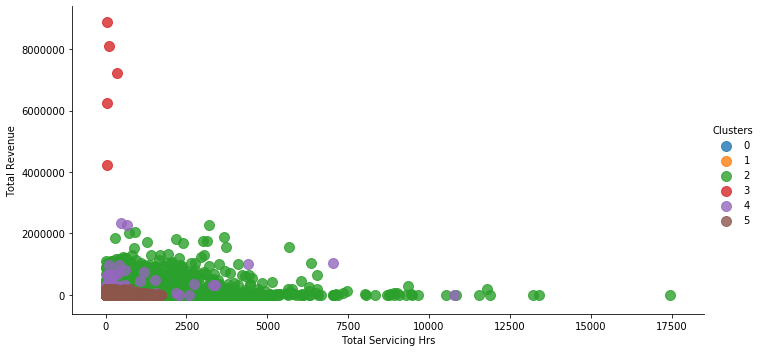

In [67]:
sns.lmplot(data=final_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})